In [87]:
# this is a simple demo for subsampled Newton methods.

import os
import numpy as np
import time
from subsampled_newton import *

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
# take ridge logistic regression problem as an example:
class logistic_regression(object):
    def __init__(self, alpha = 0.0,w0=None,w_opt=None,l_opt=None,kappa=None, hatkappa=None):
        self.alpha = alpha
        self.w0 = w0
        self.w_opt = w_opt
        self.l_opt = l_opt
        self.kappa = kappa
        self.hatkappa = hatkappa
        
    def loss(self,X,Y,w):
        return np.sum(np.log(1 + np.exp(-Y*(X.dot(w))))) + 0.5*self.alpha*(w**2).sum()
    
    def grad(self,X,Y,w):
        return -Y/(1 + np.exp(Y*(X.dot(w))))
    
    def hessian(self,X,Y,w):
        return 1/(1 + np.exp(Y*(X.dot(w))))/(1 + np.exp(-Y*(X.dot(w))))
        
def read_data(data_file_name):
    """
    read_problem(data_file_name) -> [y, x]
    Read LIBSVM-format data from data_file_name and return labels y
    and data instances x.
    """
    prob_y = []
    prob_x = []
    for line in open(data_file_name):
        line = line.split(None, 1)
        # In case an instance with all zero features
        if len(line) == 1: line += ['']
        label, features = line
        xi = {}
        for e in features.split():
            ind, val = e.split(":")
            xi[int(ind)] = float(val)
        prob_y += [float(label)]
        prob_x += [xi]
    d = max([max(x.keys()) for x in prob_x])
    X = []
    for f in prob_x:
        x = np.zeros(d)
        for k,v in f.items():
            x[k-1] = v
        X.append(x)
    
    return (np.array(prob_y),np.array(X))
        

In [107]:
[Y,X] = read_data('../a9a')
n,d = X.shape
X = np.hstack((np.ones((n,1)), X))
d = d+1
X = X / np.sqrt((X**2).sum(axis=0))
print "data dimenstion: %d x %d" % (n,d)

data dimenstion: 32561 x 124


In [108]:
problem = logistic_regression(w0=np.zeros(d),alpha=0.1)

w_opt, results_newton = newton_solver(X,Y,problem,niters=30)
problem.w_opt = w_opt
w_opt, results_newton = newton_solver(X,Y,problem,niters=25)
params = {'hessian_size': 20*d, 'mh':10, 'w0': np.zeros(d), 'niters': 25}
w1, results_lev = subsampled_newton_lev(X,Y,problem,params)

params = {'hessian_size': 20*d, 'mh':10, 'w0': np.zeros(d), 'niters': 25}
w2, results_rns = subsampled_newton_rns(X,Y,problem,params)

params = {'hessian_size': 20*d, 'mh':10, 'w0': np.zeros(d), 'niters': 25}
w3, results_uni = subsampled_newton_uniform(X,Y,problem,params)

Newton solver starts ......
Newton solver ends
Further postprocessing ......
Done! :)
Newton solver starts ......
Newton solver ends
Further postprocessing ......
Done! :)
subsample Newton (PlevSS) solver starts ......
subsample Newton (PlevSS) solver ends
Further postprocessing ......
Done! :)
subsample Newton (RnormSS) solver starts ......
subsample Newton (RnormSS) solver ends
Further postprocessing ......
Done! :)
subsample Newton (Uniform) solver starts ......
subsample Newton (Uniform) solver ends
Further postprocessing ......
Done! :)


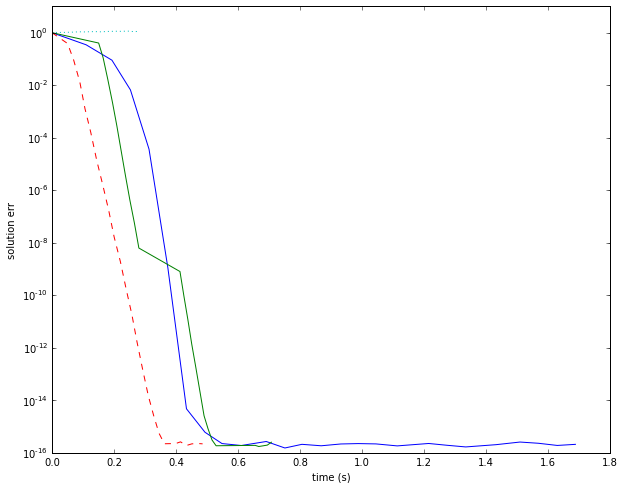

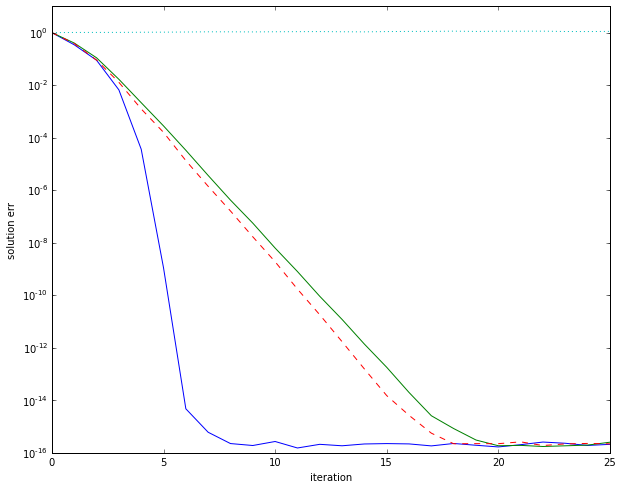

In [109]:
plt.semilogy(results_newton['t'], results_newton['errs'], label="Newton")
plt.semilogy(results_lev['t'], results_lev['errs'], label="PlevSS")
plt.semilogy(results_rns['t'], results_rns['errs'], "--", label="RnormS")
plt.semilogy(results_uni['t'], results_uni['errs'], ":", label="Uniform")
plt.xlabel("time (s)")
plt.ylabel("solution err")
plt.show()
plt.semilogy( results_newton['errs'], label="Newton")
plt.semilogy( results_lev['errs'], label="PlevSS")
plt.semilogy( results_rns['errs'], "--", label="RnormS")
plt.semilogy( results_uni['errs'], ":", label="Uniform")
plt.xlabel("iteration")
plt.ylabel("solution err")
plt.show()